In [4]:
#FUNÇÃO PARA LIMPAR RESULTADOS
import numpy as np

def clear_results(valores, tol=1e-5):
    valores = np.array(valores)
    valores[np.abs(valores) < tol] = 0
    return valores

In [5]:
#CINEMÁTICA DIRETA SIMBÓLICA

#importar bibliotecas necessárias
from roboticstoolbox import ET, ERobot
import numpy as np
from spatialmath import SE3
import sympy as sp

#definindo o braço do robô

#parâmetros do braço
a2 = 0.6 
a3 = 0.2

e = ET.tz(qlim=[0, 0.170]) * ET.tz(0.3) * ET.Rz(qlim=[-np.pi, np.pi]) * ET.tx(a2) * ET.tx(a3) * ET.Rx(qlim=[-np.pi, np.pi]) * ET.tz(-0.1) * ET.tx(0.1) * ET.tz(0.1)
#Transformação do braço num objeto ERobot
cookbot = ERobot(e)
print(cookbot)

#variáveis simbólicas
q1, q2, q3 = sp.symbols('q1 q2 q3')
pos_sim = (q1, q2, q3)

#definindo a cinemática direta simbólica
TE = e.fkine([q1, q2, q3])
print("A cinemática direta simbólica é:")
print(TE)


ERobot: , 3 joints (PRR)
┌──────┬────────┬───────┬────────┬──────────────────────────────┐
│ link │  link  │ joint │ parent │     ETS: parent to link      │
├──────┼────────┼───────┼────────┼──────────────────────────────┤
│    0 │ link0  │     0 │ BASE   │ tz(q0)                       │
│    1 │ link1  │     1 │ link0  │ tz(0.3) ⊕ Rz(q1)             │
│    2 │ link2  │     2 │ link1  │ tx(0.6) ⊕ tx(0.2) ⊕ Rx(q2)   │
│    3 │ @link3 │       │ link2  │ tz(-0.1) ⊕ tx(0.1) ⊕ tz(0.1) │
└──────┴────────┴───────┴────────┴──────────────────────────────┘

A cinemática direta simbólica é:
  1.0*cos(q2)  -1.0*sin(q2)*cos(q3) 1.0*sin(q2)*sin(q3) 0.9*cos(q2)   
  1.0*sin(q2)  1.0*cos(q2)*cos(q3) -1.0*sin(q3)*cos(q2) 0.9*sin(q2)   
  0            1.0*sin(q3)  1.0*cos(q3)  1.0*q1 + 0.3  
  0            0            0            1.00000000000000  



In [7]:
#CINEMÁTICA INVERSA NUMÉRICA

#supondo um valor de posição final e inicial
pos_inicial = (0.900, 0, 0.300)
pos_inicial = SE3(pos_inicial)

pos_final = (0, 0.900, 0.460)
pos_final = SE3(pos_final)

#cinemática inversa numérica
sol1 = cookbot.ikine_LM(pos_inicial)
sol2 = cookbot.ikine_LM(pos_final)
print("A solução numérica da cinemática inversa para posição inicial é:")
print(clear_results(sol1.q))
print("A solução numérica da cinemática inversa para posição final é:")
print(clear_results(sol2.q))



A solução numérica da cinemática inversa para posição inicial é:
[0. 0. 0.]
A solução numérica da cinemática inversa para posição final é:
[0.16       0.64652663 0.        ]


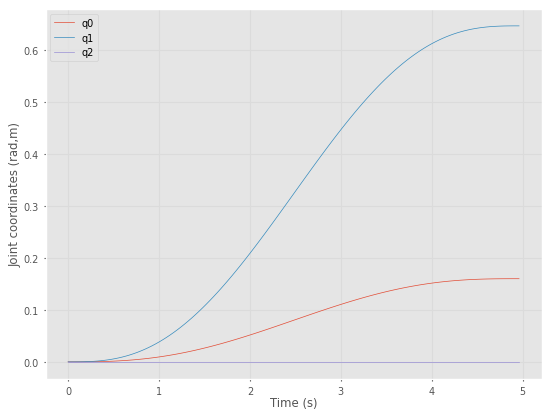

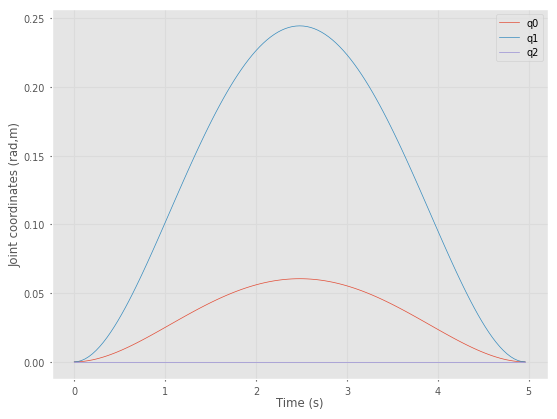

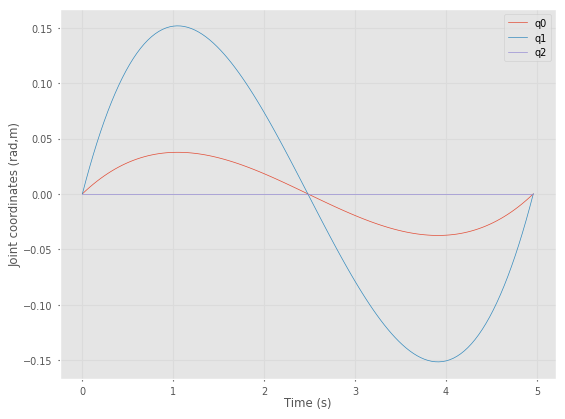

[<AxesSubplot:xlabel='Time (s)', ylabel='Joint coordinates (rad,m)'>]

In [8]:
#TRAJETÓRIAS

#intervalo de tempo
from roboticstoolbox import mtraj, quintic, xplot


t = np.arange(0, 5, 0.04) 

traj1 = mtraj(quintic, sol1.q, sol2.q, t)

xplot(t, traj1.q)
xplot(t, traj1.qd)
xplot(t, traj1.qdd)